## Final Project: HR Employee Attrition EDA and Prediction with Logistic Regression 


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

- Load Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### What are the Quantitative and Categorical Variables?

Quantitative Variables: Age, DailyRate, DistanceFromHome, Education, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

Categorical Variables: Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18

In [3]:
# i wanna see the first few rows
print("few rows of the dataset:")
df.head()

few rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- missing values?

In [4]:
print('# of NA:', df.isna().sum()) # no missing values in this data set
df.describe()
# employee count is a constant (not useful), drop it
# employee number is just an id, drop this
# standard hours is constant, drop it
# over 18 is also constant, drop it

# of NA: Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
Y

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* im going to drop the variables that are not going to help with predictions!

In [5]:
drop_columns = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df = df.drop(columns=drop_columns, errors='ignore')
df.info() # nice!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Primary Target Variable 
- I want to predict Attrition and why employees might be leaving IBM. 

In [6]:
# first, check for unique value in case, we will be encoding variables
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}':\n{unique_values}")


Unique values in 'Age':
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Unique values in 'Attrition':
['Yes' 'No']

Unique values in 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique values in 'DailyRate':
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  

We will have to encode data!
* Variables w/Binary Values: Attrition (Yes|No), OverTime(Yes|No), Gender(Female|Male) 
* Descriptive Values: BusinessTravel, Department, EducationField, JobRole, MaritalStatus

In [7]:
binary_cols = ['Attrition', 'OverTime', 'Gender']

#  Yes/No or Male/Female to 1/0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0}) # 1 is attrited and 0 is not attrited
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0}) # 1=overtime, 0=no overtime
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}) # 1=male, 0=females

In [8]:
descriptive_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

df = pd.get_dummies(df, columns=descriptive_cols, drop_first=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

## Time to do some Exploratory Data Analysis. 
* let's see first how many people have left vs stayed at IBM
* using countplot!

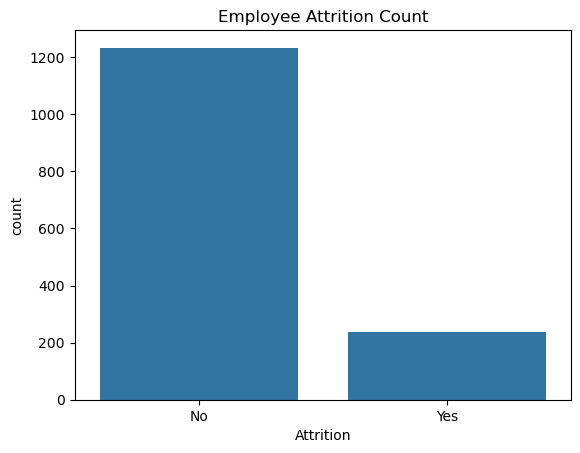

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [10]:
# how many employees have left vs stayed?
sns.countplot(x='Attrition', data=df)
plt.xticks([0,1], ['No', 'Yes']) # changing the axis label to say NO and Yes for attrition
plt.title('Employee Attrition Count')
plt.show()

# Percentages of how many employees left or stayed at IBM.
print(df['Attrition'].value_counts(normalize=True) * 100)
# 


**It looks like approximately 16.12% of employees left IBM.**

### 1. Let's do EDA on Numeric Variables

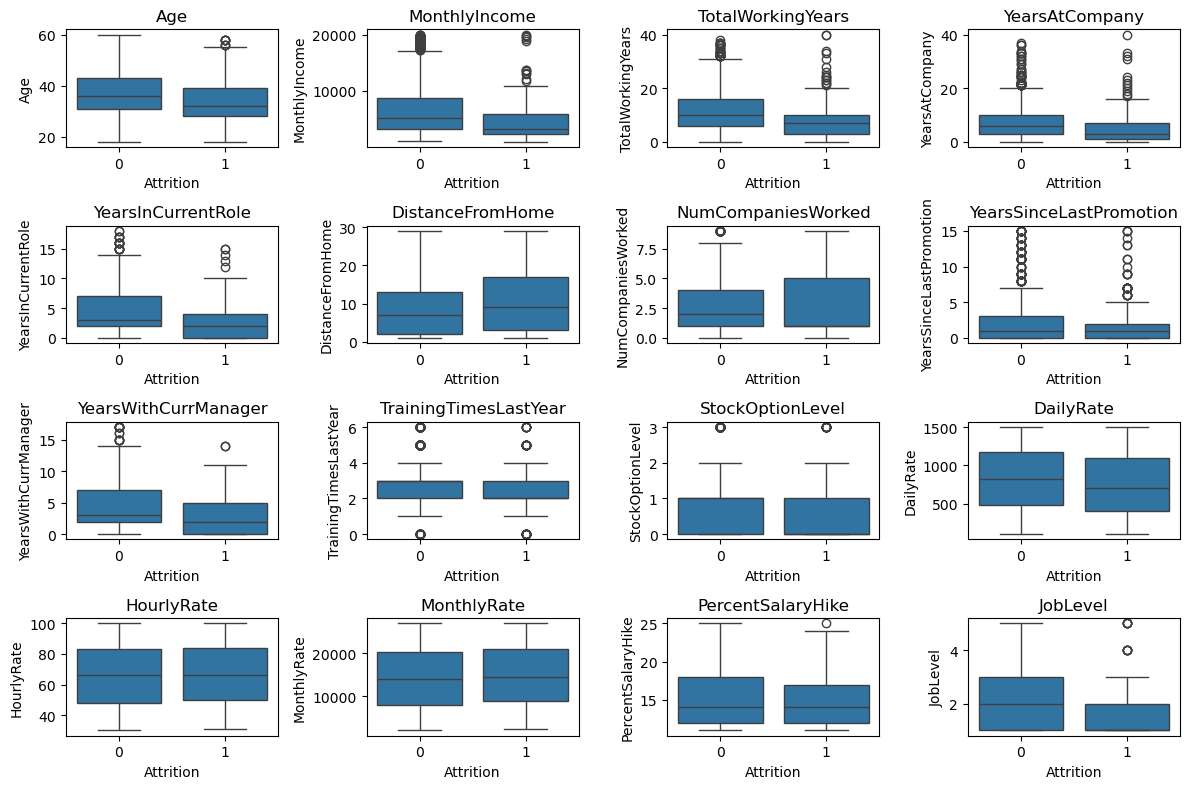

In [11]:
# box plot!
numeric_vars = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'DistanceFromHome', 'NumCompaniesWorked', 'YearsSinceLastPromotion',
                'YearsWithCurrManager', 'TrainingTimesLastYear', 'StockOptionLevel', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'PercentSalaryHike', 'JobLevel']
fig, axes = plt.subplots(4, 4, figsize=(12,8))
axes = axes.flatten()
for i, col in enumerate(numeric_vars):
    sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

* For these variables, it seems like Stock Option Levels, Hourly Rate, and Monthly Rate do not show much prediction for leaving the company, suggesting that these variables do not affect attrition for the company. 
* Instead, the major predictors for attrition here are Age, Monthly Income, Distance from Home, and Number of Companies Worked. 

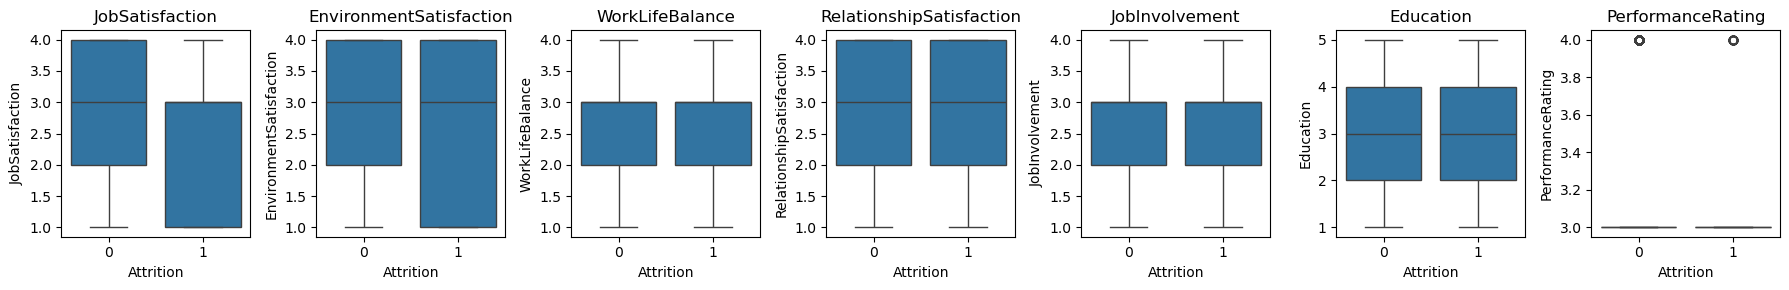

In [12]:
# next, we will still be doing box-plots but on variables that are ordinal or have positions/series to them!
# these will be ratings on satisfactions, etc
ordinal_vars = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'JobInvolvement', 'Education', 'PerformanceRating']
fig, axes = plt.subplots(1, 7, figsize=(18,3))
for i, col in enumerate(ordinal_vars):
    sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

* For these variables that have levels or series to them, the major predictors for attrition seem to be Job Satisfaction. Here, those that have much lower job satisfactions at IBM were more likely to leave the company. 

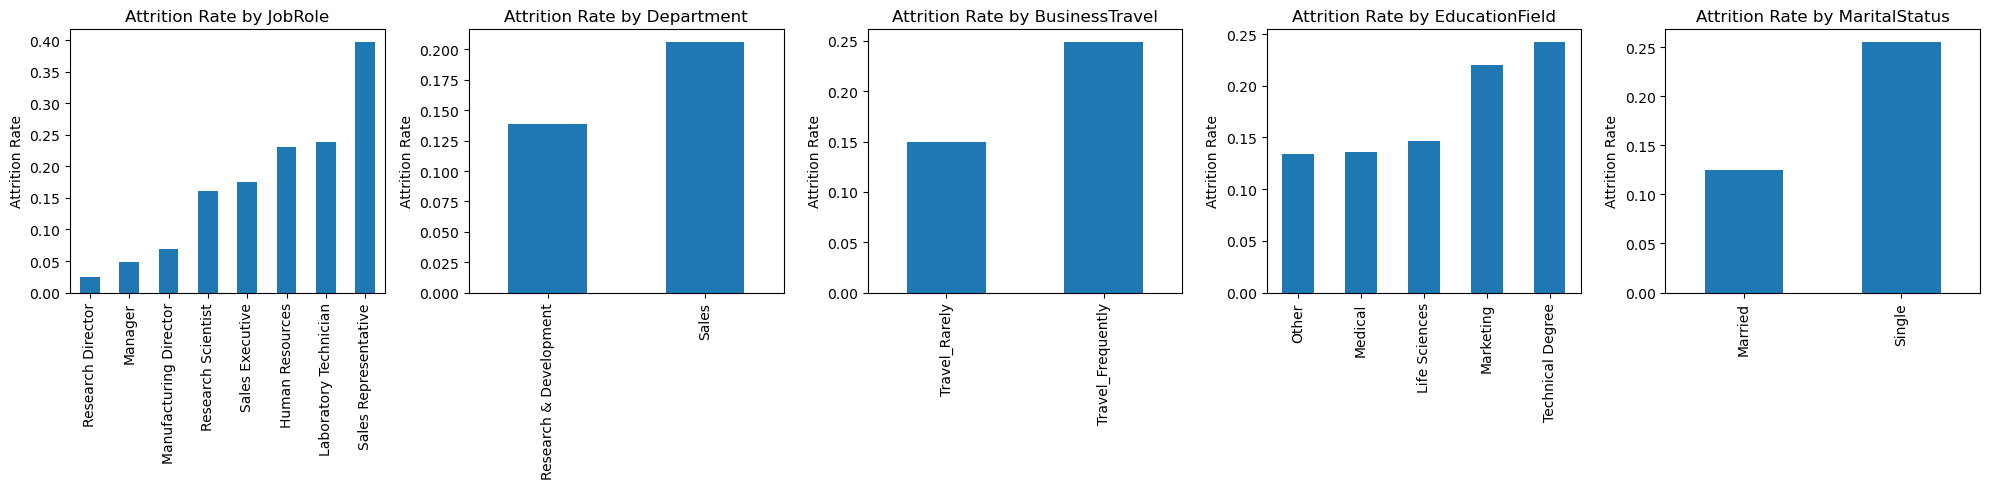

In [13]:
cat_groups = {
    'JobRole': [c for c in df.columns if c.startswith('JobRole_')],
    'Department': [c for c in df.columns if c.startswith('Department_')],
    'BusinessTravel': [c for c in df.columns if c.startswith('BusinessTravel_')],
    'EducationField': [c for c in df.columns if c.startswith('EducationField_')],
    'MaritalStatus': [c for c in df.columns if c.startswith('MaritalStatus_')]}
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, (group_name, cols) in enumerate(cat_groups.items()):
    attrition_rates = df[cols].apply(lambda col: df.loc[col == 1, 'Attrition'].mean())
    attrition_rates.index = attrition_rates.index.str.replace(f'{group_name}_','')
    attrition_rates.sort_values().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Attrition Rate by {group_name}')
    axes[i].set_ylabel('Attrition Rate')
plt.tight_layout()
plt.show()

* For these categorical variables, those who left the company were more likely to be working in Sales, a Sales Representative, Traveled frequently for work, have a technical or marketing degree, and were single. 

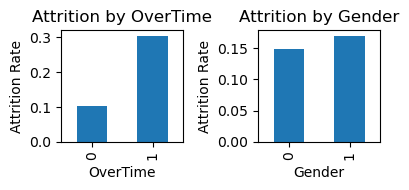

In [14]:
# binary variables
binary_vars = ['OverTime', 'Gender']
fig, axes = plt.subplots(1, len(binary_vars), figsize=(4,2))
for i, col in enumerate(binary_vars):
    df.groupby(col)['Attrition'].mean().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Attrition by {col}')
    axes[i].set_ylabel('Attrition Rate')
plt.tight_layout()
plt.show()


* Those who left the company were more likely to be working overtime a lot. Males were slightly higher than females to be leaving the company. 

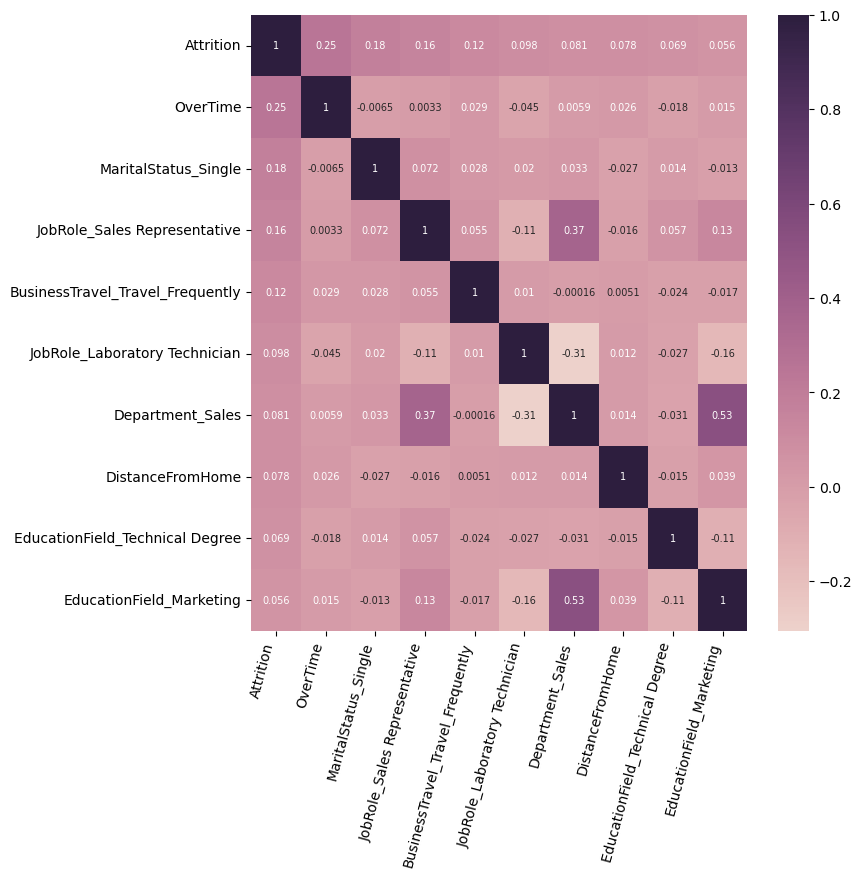

In [15]:
# lets do a correlation matrix, im going to filter just top 10 most correlated ones since there are a lot of variables!
corr = df.corr()['Attrition'].sort_values(ascending=False)
top_cols = corr.head(10).index
plt.figure(figsize=(8,8))
sns.heatmap(df[top_cols].corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws={"size":7})
plt.xticks(rotation=75, ha='right')
plt.show()

#### EDA Conclusions
* Here, using the correlation matrix, it seems like the biggest predictors towards attrition and why might Employees be leaving IBM is because of those who are working overtime, single, and working as a sales representative. This makes sense since those who are working overtime, are burnt out and might want to do something else for a change. Those who are single do not have a family to support, making it easy to leave a job. Sales can be a career that is high stress since it requires people to pitch to others and talk to others, with high performance demands. 

### 2. Logistic Regression model! 
* first, train/test split
* we are going to use 30% of the test set data

In [16]:
# lets define X and Y
X = df.drop('Attrition', axis=1) # columns without target
y = df['Attrition'] # target variable

# splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67, stratify=y)

* lets scale and then fit the model

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=67, max_iter=5000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, random_state=67)

* let's check training accuracy and testing accuracy

In [18]:
from sklearn.metrics import accuracy_score
y_train_pred = log_reg.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8940719144800777


In [19]:
y_test_pred = log_reg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8594104308390023


The model was able to get a training accuracy of 89.4% and a test accuracy of 0.85.9%. This is a small difference between the two which suggests that the model was able to generalize well and is not overfitting! The overall accuracy seems to only be modestly higher than baseline accuracy of about 84%, this means improvement! The model is learning meaningful patterns related to attrition. 

**Now, Confusion Matrix!**

[[839  24]
 [ 85  81]]


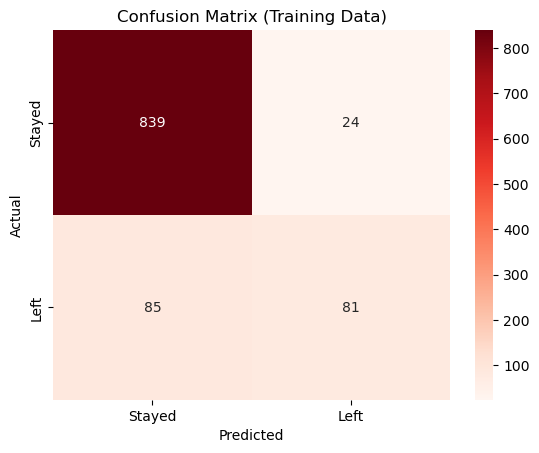

In [20]:
# how does it look for the training data?
confusion_train = confusion_matrix(y_train, y_train_pred)
print(confusion_train)
sns.heatmap(confusion_train, annot=True,fmt='d',cmap='Reds', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training Data)')
plt.show()

[[350  20]
 [ 42  29]]


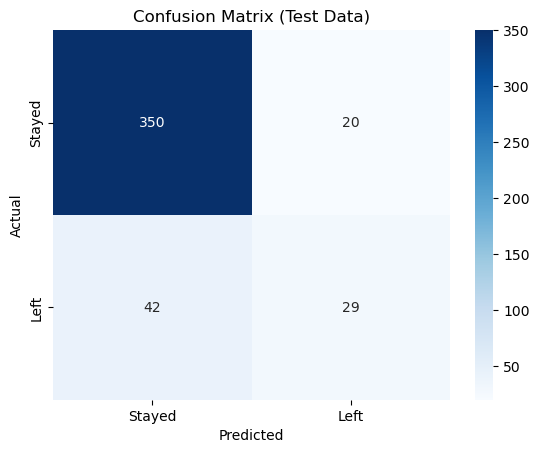

In [21]:
#lets get and plot a confusion matrix for the test data
confusion_test = confusion_matrix(y_test, y_test_pred)
print(confusion_test)
sns.heatmap(confusion_test, annot=True,fmt='d',cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()


The confusion matrix shows that the model does well in identifying employees who stay at IBM, with relatively few false positives. However, the model is less effective at identifying employees who leave, missing a portion of attrition. For the test data, the model was able to identify 29 of the 71 employees who left (~41%). This is likely due to other variables or factors not captured by the dataset that influence attrition, such as personal circumstances or other opportunities.

**Classification Time**

In [22]:
class_report = classification_report(y_test, y_test_pred)
print("Classification Report (Test Data):\n", class_report)

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       370
           1       0.59      0.41      0.48        71

    accuracy                           0.86       441
   macro avg       0.74      0.68      0.70       441
weighted avg       0.84      0.86      0.85       441



As said previously, the model achieves 86% overall accuracy, it predicts employee retention well. There is a difference between classes with the model being able to identify those who stay with recall of 0.95%, but not as successful at detecting those who leave with recall 0.41%. It suggests that the model can flag those who stay but more data is needed to capture attrition. 

**ROC TIME**

AUC: 0.8167872097449561


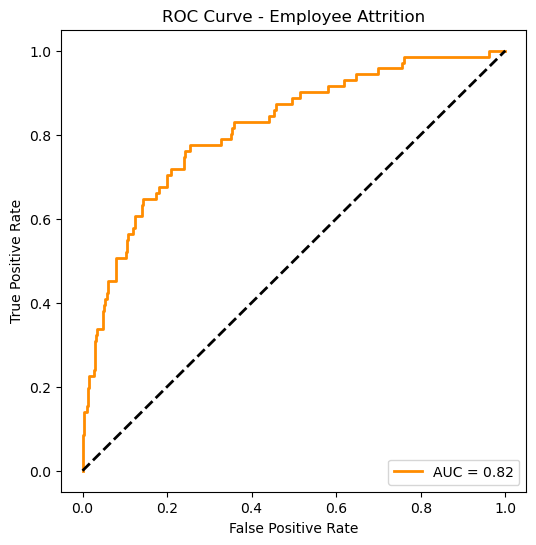

In [23]:
# ROC curve = receiver operating characteristic curve, show how well model separates classes (Stay vs Leave)
# AUC: area under the curve, 0.5 = random guessing, 1 = perfect classifier | ability of model to distinguish between classes

# Predict probabilities for the "1" class (Attrition = Left)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc_score = roc_auc_score(y_test, y_prob)
print("AUC:", auc_score)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange', linewidth=2)
plt.plot([0,1], [0,1], 'k--', linewidth=2)  # diagonal = random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Employee Attrition')
plt.legend(loc='lower right')
plt.show()

**Yay, now I am going to extract the $\beta$ coefficients in the variable `logregz.coef_`**
* compares $beta_k$ values directly, with the largest one corresponding to the variable with the highest impact on prediction  

In [24]:
logregz = LogisticRegression(random_state=67, max_iter=5000)
logregz.fit(X_train_scaled, y_train)

# Coefficients for each feature
coefficients = logregz.coef_[0]

# Intercept
intercept = logregz.intercept_[0]

print("Intercept (β0):", intercept)

# Combine feature names with coefficients
feature_names = X_train.columns  # original column names
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.3f}")


Intercept (β0): -2.692835503502621
Age: -0.454
DailyRate: -0.098
DistanceFromHome: 0.256
Education: 0.073
EnvironmentSatisfaction: -0.365
Gender: 0.145
HourlyRate: -0.101
JobInvolvement: -0.375
JobLevel: 0.040
JobSatisfaction: -0.526
MonthlyIncome: 0.230
MonthlyRate: 0.088
NumCompaniesWorked: 0.463
OverTime: 0.925
PercentSalaryHike: -0.160
PerformanceRating: 0.104
RelationshipSatisfaction: -0.442
StockOptionLevel: -0.077
TotalWorkingYears: -0.234
TrainingTimesLastYear: -0.270
WorkLifeBalance: -0.235
YearsAtCompany: 0.519
YearsInCurrentRole: -0.486
YearsSinceLastPromotion: 0.426
YearsWithCurrManager: -0.586
BusinessTravel_Travel_Frequently: 0.751
BusinessTravel_Travel_Rarely: 0.429
Department_Research & Development: 0.006
Department_Sales: 0.382
EducationField_Life Sciences: -0.362
EducationField_Marketing: -0.142
EducationField_Medical: -0.293
EducationField_Other: -0.155
EducationField_Technical Degree: -0.009
JobRole_Human Resources: 0.246
JobRole_Laboratory Technician: 0.777
JobRole

The logistic regression model predicts attrition with an accuracy of 86% and an AUC of 0.82, which is consistent and indicates a strong ability to distinguish employees that stay and those who leave. Employees that are at risk for leaving are those who work overtime, single, in sale roles, or frequently traveling for work. They have high attrition rates both within the data and in the logistic regression coefficients. In the Regression Coefficient, the strongest predictors of attrition were OverTime, MaritalStatus_Single, and BusinessTravel_Frequently. This means that one standard deviation increase in these variables would mean it would significantly increase the odds of leaving IBM! In contrast, factors like JobSatisfaction and YearsWithCurrManager decreases the likelihood of attrition, which highlights the importance of employee engagement and relationships in the workplace. Performance related factors like YearsSinceLastPromotion, PercentSalaryHike, and TrainingTimesLastYear show moderate influence in attrition, this suggests that employees might be leaving due to slower career progress or lack of growth at their job. 

To conclude, the results explain that there should be HR interventions that focus on managing workloads, employee engagement, and career developments that could help IBM reduce attrition, especially for the groups high at risk. 